<div class="alert alert-success">
    
**Комментарий ревьюера**

Привет! Меня зовут Сысоева Вера.
    
Далее в файле мои комментарии ты сможешь найти в ячейках, аналогичных данной ( если рамки комментария зелёные и отмечены **#ок** - всё сделано правильно; жёлтые и отмечены **#можно лучше** - есть замечания, но не критично; красные с пометкой **#ошибка** - нужно переделать). Не удаляй эти комментарии и постарайся учесть их в ходе выполнения проекта.
    
    
Я буду поддерживать версионность комментариев, и при следующих итерациях комментарии будут выделены, как "Комментраии ревьюера - 2 (3 и.т.д.)"
    
Если у тебя есть замечания, возражения и вопросы, ты можешь писать свои комментарии, по возможности выделяй их так же цветом (например, синим), чтоб их можно было легко отделить от текста проекта. 
    
Кстати, предлагаю сразу общаться на "ты".
    
Увидев у тебя ошибку, в первый раз я лишь укажу на ее наличие и дам тебе возможность самостоятельно найти и исправить ее. На реальной работе твой начальник будет поступать так же, а я пытаюсь подготовить тебя именно к работе аналитиком. Но если ты пока не справишься с такой задачей - при следующей проверке я дам более точную подсказку.
    
</div>

<div class="alert alert-info">
<h2> Комментарий студента <a class="tocSkip"> </h2>

Приветствую, Вера! Рад познакомиться!
</div>

# SQL

Коронавирус застал мир врасплох, изменив привычный порядок вещей. В свободное время жители городов больше не выходят на улицу, не посещают кафе и торговые центры. Зато стало больше времени для книг. Это заметили стартаперы — и бросились создавать приложения для тех, кто любит читать.

Ваша компания решила быть на волне и купила крупный сервис для чтения книг по подписке. Ваша первая задача как аналитика — проанализировать базу данных.
В ней — информация о книгах, издательствах, авторах, а также пользовательские обзоры книг. Эти данные помогут сформулировать ценностное предложение для нового продукта.

### Цель

Проанализировать базу данных

### Описание данных

**Таблица `books`**

Содержит данные о книгах:

- `book_id` — идентификатор книги;
- `author_id` — идентификатор автора;
- `title` — название книги;
- `num_pages` — количество страниц;
- `publication_date` — дата публикации книги;
- `publisher_id` — идентификатор издателя.

**Таблица `authors`**

Содержит данные об авторах:

- `author_id` — идентификатор автора;
- `author` — имя автора.

**Таблица `publishers`**

Содержит данные об издательствах:

- `publisher_id` — идентификатор издательства;
- `publisher` — название издательства;

**Таблица `ratings`**

Содержит данные о пользовательских оценках книг:

- `rating_id` — идентификатор оценки;
- `book_id` — идентификатор книги;
- `username` — имя пользователя, оставившего оценку;
- `rating` — оценка книги.

**Таблица `reviews`**

Содержит данные о пользовательских обзорах на книги:

- `review_id` — идентификатор обзора;
- `book_id` — идентификатор книги;
- `username` — имя пользователя, написавшего обзор;
- `text` — текст обзора.

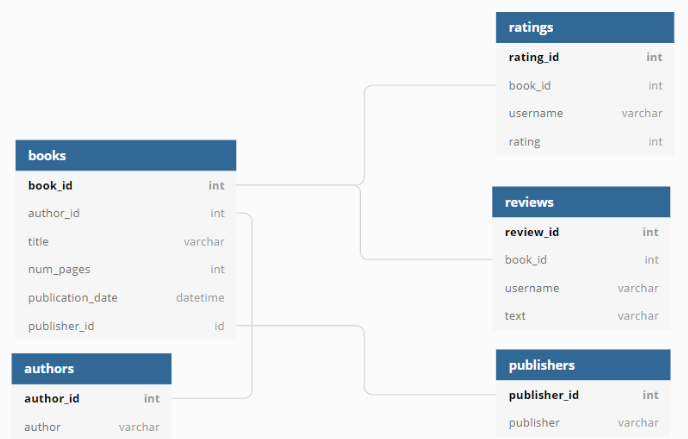

### Задания

- Посчитайте, сколько книг вышло после 1 января 2000 года;
- Для каждой книги посчитайте количество обзоров и среднюю оценку;
- Определите издательство, которое выпустило наибольшее число книг толще 50 страниц — так вы исключите из анализа брошюры;
- Определите автора с самой высокой средней оценкой книг — учитывайте только книги с 50 и более оценками;
- Посчитайте среднее количество обзоров от пользователей, которые поставили больше 50 оценок.

### Таблицы

In [1]:
# импортируем библиотеки
import pandas as pd
from sqlalchemy import create_engine
# устанавливаем параметры
db_config = {'user': 'praktikum_student', # имя пользователя
'pwd': 'Sdf4$2;d-d30pp', # пароль
'host': 'rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net',
'port': 6432, # порт подключения
'db': 'data-analyst-final-project-db'} # название базы данных
connection_string = 'postgresql://{}:{}@{}:{}/{}'.format(db_config['user'],
 db_config['pwd'],
 db_config['host'],
 db_config['port'],
 db_config['db'])
# сохраняем коннектор
engine = create_engine(connection_string, connect_args={'sslmode':'require'}) 

<div class="alert alert-success">
    
**Комментарий ревьюера**

**#ок**

Отлично, ты верно подключился к базе

</div>

#### Таблица books

In [2]:
query = '''
SELECT *
FROM books
LIMIT 10
'''
pd.io.sql.read_sql(query, con = engine)

,book_id,author_id,title,num_pages,publication_date,publisher_id
0,1,546,'Salem's Lot,594,2005-11-01,93
1,2,465,1 000 Places to See Before You Die,992,2003-05-22,336
2,3,407,13 Little Blue Envelopes (Little Blue Envelope...,322,2010-12-21,135
3,4,82,1491: New Revelations of the Americas Before C...,541,2006-10-10,309
4,5,125,1776,386,2006-07-04,268
5,6,257,1st to Die (Women's Murder Club #1),424,2005-05-20,116
6,7,258,2nd Chance (Women's Murder Club #2),400,2005-05-20,116
7,8,260,4th of July (Women's Murder Club #4),448,2006-06-01,318
8,9,563,A Beautiful Mind,461,2002-02-04,104
9,10,445,A Bend in the Road,341,2005-04-01,116


#### Таблица authors

In [3]:
query = '''
SELECT *
FROM authors
LIMIT 10
'''
pd.io.sql.read_sql(query, con = engine)

,author_id,author
0,1,A.S. Byatt
1,2,Aesop/Laura Harris/Laura Gibbs
2,3,Agatha Christie
3,4,Alan Brennert
4,5,Alan Moore/David Lloyd
5,6,Alan Paton
6,7,Albert Camus/Justin O'Brien
7,8,Aldous Huxley
8,9,Aldous Huxley/Christopher Hitchens
9,10,Aleksandr Solzhenitsyn/H.T. Willetts


#### Таблица publishers

In [4]:
query = '''
SELECT *
FROM publishers
LIMIT 10
'''
pd.io.sql.read_sql(query, con = engine)

,publisher_id,publisher
0,1,Ace
1,2,Ace Book
2,3,Ace Books
3,4,Ace Hardcover
4,5,Addison Wesley Publishing Company
5,6,Aladdin
6,7,Aladdin Paperbacks
7,8,Albin Michel
8,9,Alfred A. Knopf
9,10,Alfred A. Knopf Books for Young Readers


#### Таблица ratings

In [5]:
query = '''
SELECT *
FROM ratings
LIMIT 10
'''
pd.io.sql.read_sql(query, con = engine)

,rating_id,book_id,username,rating
0,1,1,ryanfranco,4
1,2,1,grantpatricia,2
2,3,1,brandtandrea,5
3,4,2,lorichen,3
4,5,2,mariokeller,2
5,6,3,johnsonamanda,4
6,7,3,scotttamara,5
7,8,3,lesliegibbs,5
8,9,4,abbottjames,5
9,10,4,valenciaanne,4


#### Таблица reviews

In [6]:
query = '''
SELECT *
FROM reviews
LIMIT 10
'''
pd.io.sql.read_sql(query, con = engine)

,review_id,book_id,username,text
0,1,1,brandtandrea,Mention society tell send professor analysis. ...
1,2,1,ryanfranco,Foot glass pretty audience hit themselves. Amo...
2,3,2,lorichen,Listen treat keep worry. Miss husband tax but ...
3,4,3,johnsonamanda,Finally month interesting blue could nature cu...
4,5,3,scotttamara,Nation purpose heavy give wait song will. List...
5,6,3,lesliegibbs,Analysis no several cause international.
6,7,4,valenciaanne,One there cost another. Say type save. With pe...
7,8,4,abbottjames,Within enough mother. There at system full rec...
8,9,5,npowers,Thank now focus realize economy focus fly. Ite...
9,10,5,staylor,Game push lot reduce where remember. Including...


<div class="alert alert-warning">
    
**Комментарий ревьюера**

**#можно лучше**

Хорошо, таблицы верно подгружены. 

Дополнительно можно было проверить данные на корректность, посмотреть info и duplicated.

Тогда в конце раздела можно было бы написать выводы по качеству полученных данных

</div>

### Запросы

*Все запросы SQL преобразованы в общий красивый код через сайт: https://wtools.io/ru/sql-formatter*

#### Посчитайте, сколько книг вышло после 1 января 2000 года

In [7]:
query = '''
SELECT COUNT(book_id)
FROM books
WHERE publication_date >= DATE('2000-01-01')
'''
pd.io.sql.read_sql(query, con = engine)

,count
0,821


Количество книг вышедших после 1 января 2000 года: 821

<div class="alert alert-success">
    
**Комментарий ревьюера**

**#ок**

Все верно рассчитано

</div>

#### Для каждой книги посчитайте количество обзоров и среднюю оценку

In [8]:
query = '''
SELECT b.title ,
         count(username) AS number_of_reviews,
         avg(rating) AS avg_rating
FROM books AS b
LEFT JOIN ratings AS r
    ON b.book_id=r.book_id
GROUP BY  b.title
'''
pd.io.sql.read_sql(query, con = engine)

,title,number_of_reviews,avg_rating
0,The Count of Monte Cristo,23,4.217391
1,Count Zero (Sprawl #2),2,2.500000
2,The Botany of Desire: A Plant's-Eye View of th...,2,3.500000
3,The Poisonwood Bible,22,4.363636
4,The Canterbury Tales,6,3.333333
...,...,...,...
994,Of Love and Other Demons,2,4.500000
995,In the Heart of the Sea: The Tragedy of the Wh...,3,3.333333
996,Welcome to Temptation (Dempseys #1),2,5.000000
997,World's End (The Sandman #8),2,4.500000


<div class="alert alert-warning">
    
**Комментарий ревьюера**

**#можно лучше**

1. Лучше было считать разные review_id, а не user_name
2. Лучше было отсортировать либо по рейтингу, либо по количеству отзывов
</div>

#### Определите издательство, которое выпустило наибольшее число книг толще 50 страниц — так вы исключите из анализа брошюры

In [9]:
query = '''
SELECT p.publisher,
         count(b.book_id)
FROM books AS b
LEFT JOIN publishers AS p
    ON b.publisher_id = p.publisher_id
WHERE b.num_pages > 50
GROUP BY  p.publisher
ORDER BY  count(b.book_id) DESC limit 1
'''
pd.io.sql.read_sql(query, con = engine)

,publisher,count
0,Penguin Books,42


<div class="alert alert-success">
    
**Комментарий ревьюера**

**#ок**

Здесь все правильно

</div>

#### Определите автора с самой высокой средней оценкой книг — учитывайте только книги с 50 и более оценками;

In [10]:
query = '''
SELECT a.author,
         round(avg(tabl_book.avg_raiting),
        2) FROM
    (SELECT title,
         AVG(rating) AS avg_raiting,
         COUNT(rating) AS cnt
    FROM books
    LEFT JOIN ratings
    ON books.book_id = ratings.book_id
    GROUP BY  title
    HAVING COUNT(rating_id) >= 50) AS tabl_book
LEFT JOIN books AS b
    ON b.title = tabl_book.title
LEFT JOIN authors AS a
    ON a.author_id = b.author_id
GROUP BY  a.author
ORDER BY  avg(tabl_book.avg_raiting) DESC LIMIT 1
'''
pd.io.sql.read_sql(query, con = engine)

,author,round
0,J.K. Rowling/Mary GrandPré,4.28


<div class="alert alert-danger">
    
**Комментарий ревьюера**

**#ошибка**

Автор определен верно в данном случае. Но рейтинг посчитан не правильно. Фактически ты посчитал не средний рейтинг автора, а средний рейтинг одной из ее книг (самой высокой)

В данном запросе важен порядок операций. Нужно сначала в подзапросе определить книги с более чем 50 обзорами. В этом подзапросе идентификатор автора не нужен. Затем список этих книг объединить со списком авторов. И уже для автора определять средний рейтинг (группировка по author_id)


</div>

<div class="alert alert-info">
<h2> Комментарий студента <a class="tocSkip"> </h2>

Исправил
</div>

<div class="alert alert-success">
    
**Комментарий ревьюера - 2**

**#ок**

Отлично, теперь верно

</div>

#### Посчитайте среднее количество обзоров от пользователей, которые поставили больше 50 оценок.

In [11]:
query = '''
SELECT round(avg(tabl.count),
        0) AS avg_count from
    (SELECT r.username,
         count(r.username) from
        (SELECT username from
            (SELECT username,
         count(username) AS count_estimation
            FROM ratings
            GROUP BY  username) AS count_username
            WHERE count_username.count_estimation > 50) AS us
            LEFT JOIN reviews AS r
                ON us.username = r.username
            GROUP BY  r.username) AS tabl
'''
pd.io.sql.read_sql(query, con = engine)

,avg_count
0,24.0


<div class="alert alert-warning">
    
**Комментарий ревьюера**

**#можно лучше**

Да, все правильно рассчитано. Но с учетом того, что это количество обзоров, лучше округлить до целого

</div>

### Вывод

Проанализировали базу данных с помощью заданий:
* Посчитайте, сколько книг вышло после 1 января 2000 года - **821 книга**
* Для каждой книги посчитайте количество обзоров и среднюю оценку - **в пунте 5.2 представлена таблица с количеством обзоров и средней оценкой**
* Определите издательство, которое выпустило наибольшее число книг толще 50 страниц - **издательство Penguin Books выпустило 42 книги**
* Определите автора с самой высокой средней оценкой книг — учитывайте только книги с 50 и более оценками - **автор J.K. Rowling/Mary GrandPré, средняя оценка 4.28**
* Посчитайте среднее количество обзоров от пользователей, которые поставили больше 50 оценок - **среднее количество обзоров 24.33**

<div class="alert alert-success">
    
**Комментарий ревьюера**

**#ок**

Отличная работа, могу с уверенностью сказать - ты хорошо владеешь пройденным материалом. Поправь небольшую неточность в одном запросе. 
       
Теперь мы знаем многие операции с `SQL` в использовании `python` и это отлично, потому что мы будем достаточно часто использовать в нашей практике.
    
Полезные ссылки по SQL:
    
https://habr.com/ru/post/268983/
    
https://habr.com/ru/post/340460/

</div>